<a href="https://colab.research.google.com/github/victorbuenog/Flapper/blob/main/Policy_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/victorbuenog/Flapper.git

Cloning into 'Flapper'...
remote: Enumerating objects: 592, done.
remote: Counting objects: 100% (424/424), done.
remote: Compressing objects: 100% (417/417), done.
remote: Total 592 (delta 56), reused 0 (delta 0), pack-reused 168 (from 1)
Receiving objects: 100% (592/592), 27.20 MiB | 10.21 MiB/s, done.
Resolving deltas: 100% (84/84), done.


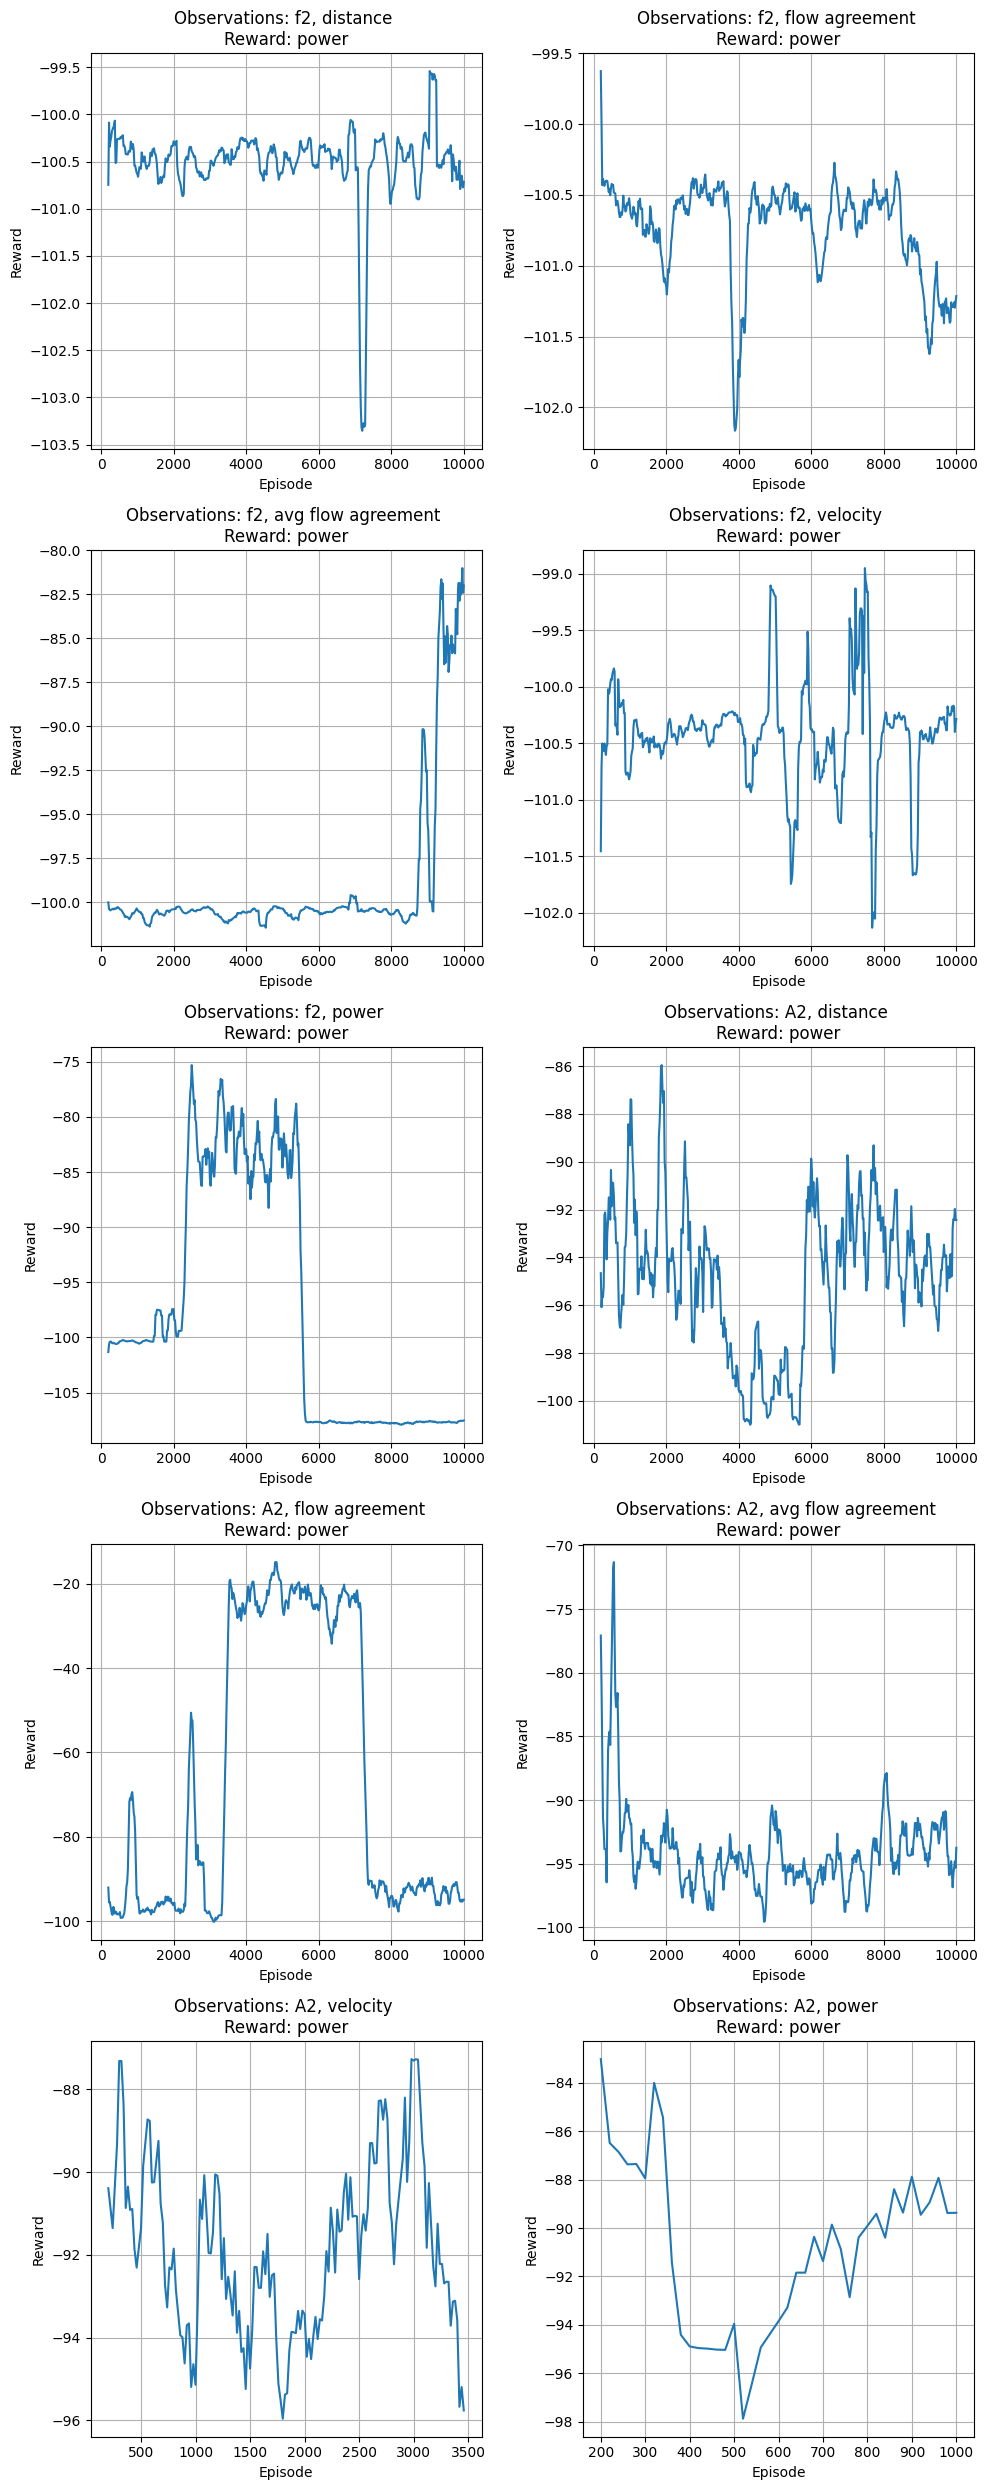

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

obs_action = ['f2','A2']
obs_flow = ['distance', 'flow agreement', 'avg flow agreement', 'velocity', 'power']
rewards = ['power']

# Calculate the number of rows and columns for the subplots
num_cols = len(obs_action) * len(rewards)
num_rows = len(obs_flow)


fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))

if num_rows > 1:
  axes = axes.flatten()
else:
  axes = axes

subplot_index = 0

for obs1 in obs_action:
    for obs2 in obs_flow:
        for reward in rewards:
            df = pd.read_csv(f"/content/Flapper/Logs/log_PPO_Flappers_ACT_{obs1}_OBS_['{obs1}', '{obs2}']_REW_['{reward}'].csv")

            axes[subplot_index].plot(df["Episode"], df["reward"].rolling(10).mean())
            axes[subplot_index].set_xlabel('Episode')
            axes[subplot_index].set_ylabel('Reward')
            axes[subplot_index].set_title(f'Observations: {obs1}, {obs2} \nReward: {reward}')
            axes[subplot_index].grid(True)

            if df["reward"].max() < -100:
                axes[subplot_index].set_facecolor('red')

            subplot_index += 1

plt.tight_layout()
plt.show()